In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [19]:
df=pd.read_csv('IMDB-Movie-Data.csv')

In [9]:
df.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


In [10]:
df.shape

(1000, 12)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                1000 non-null   int64  
 1   Title               1000 non-null   object 
 2   Genre               1000 non-null   object 
 3   Description         1000 non-null   object 
 4   Director            1000 non-null   object 
 5   Actors              1000 non-null   object 
 6   Year                1000 non-null   int64  
 7   Runtime (Minutes)   1000 non-null   int64  
 8   Rating              1000 non-null   float64
 9   Votes               1000 non-null   int64  
 10  Revenue (Millions)  872 non-null    float64
 11  Metascore           936 non-null    float64
dtypes: float64(3), int64(4), object(5)
memory usage: 93.9+ KB


In [14]:
df.isna().sum()

Rank                    0
Title                   0
Genre                   0
Description             0
Director                0
Actors                  0
Year                    0
Runtime (Minutes)       0
Rating                  0
Votes                   0
Revenue (Millions)    128
Metascore              64
dtype: int64

<Axes: >

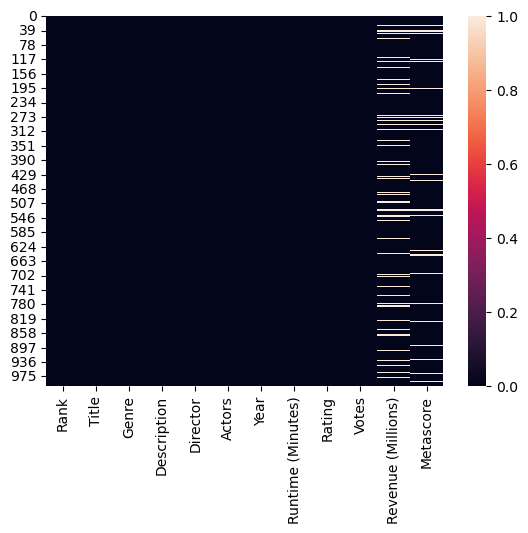

In [20]:
sns.heatmap(df.isna())

In [26]:
missing = df.isna().sum()*100/len(df)
missing

Rank                   0.0
Title                  0.0
Genre                  0.0
Description            0.0
Director               0.0
Actors                 0.0
Year                   0.0
Runtime (Minutes)      0.0
Rating                 0.0
Votes                  0.0
Revenue (Millions)    12.8
Metascore              6.4
dtype: float64

In [28]:
df = df.dropna(axis=0)
df.isna().sum()

Rank                  0
Title                 0
Genre                 0
Description           0
Director              0
Actors                0
Year                  0
Runtime (Minutes)     0
Rating                0
Votes                 0
Revenue (Millions)    0
Metascore             0
dtype: int64

In [30]:
duplicate = df.duplicated().any()
duplicate

False

In [31]:
df.describe()

,Rank,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
count,838.000000,838.00000,838.000000,838.000000,8.380000e+02,838.000000,838.000000
mean,485.247017,2012.50716,114.638425,6.814320,1.932303e+05,84.564558,59.575179
std,286.572065,3.17236,18.470922,0.877754,1.930990e+05,104.520227,16.952416
min,1.000000,2006.00000,66.000000,1.900000,1.780000e+02,0.000000,11.000000
25%,238.250000,2010.00000,101.000000,6.300000,6.127650e+04,13.967500,47.000000
50%,475.500000,2013.00000,112.000000,6.900000,1.368795e+05,48.150000,60.000000
75%,729.750000,2015.00000,124.000000,7.500000,2.710830e+05,116.800000,72.000000
max,1000.000000,2016.00000,187.000000,9.000000,1.791916e+06,936.630000,100.000000


In [32]:
df.columns

Index(['Rank', 'Title', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)',
       'Metascore'],
      dtype='object')

In [33]:
df_runtime = df[df['Runtime (Minutes)'] >=180]['Title']
df_runtime

82     The Wolf of Wall Street
88           The Hateful Eight
311             La vie d'Adèle
Name: Title, dtype: object

In [36]:
df_high_voting = df.groupby('Year')['Votes'].mean()
df_high_voting.sort_values(ascending=False)

Year
2012    290861.483871
2006    277232.219512
2009    267180.577778
2008    266580.145833
2007    266530.704545
2010    261082.929825
2011    259254.736842
2013    225531.892857
2014    211926.881720
2015    129512.651376
2016     68437.823232
Name: Votes, dtype: float64

In [39]:
df.nlargest(10,'Runtime (Minutes)')[['Title','Runtime (Minutes)']]

,Title,Runtime (Minutes)
88,The Hateful Eight,187
82,The Wolf of Wall Street,180
311,La vie d'Adèle,180
267,Cloud Atlas,172
430,3 Idiots,170
36,Interstellar,169
75,Pirates of the Caribbean: At World's End,169
271,The Hobbit: An Unexpected Journey,169
425,The Curious Case of Benjamin Button,166
126,Transformers: Age of Extinction,165


In [41]:
features = df[[
    'Genre',
    'Director',
    'Runtime (Minutes)',
    'Votes',
    'Revenue (Millions)',
    'Metascore'
]]
features.head()

,Genre,Director,Runtime (Minutes),Votes,Revenue (Millions),Metascore
0,"Action,Adventure,Sci-Fi",James Gunn,121,757074,333.13,76.0
1,"Adventure,Mystery,Sci-Fi",Ridley Scott,124,485820,126.46,65.0
2,"Horror,Thriller",M. Night Shyamalan,117,157606,138.12,62.0
3,"Animation,Comedy,Family",Christophe Lourdelet,108,60545,270.32,59.0
4,"Action,Adventure,Fantasy",David Ayer,123,393727,325.02,40.0


In [43]:
X = features
y = df['Rating']

In [45]:
categorical_features = ['Genre', 'Director']
numerical_features = ['Runtime (Minutes)', 'Votes',
                      'Revenue (Millions)', 'Metascore']

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.decomposition import TruncatedSVD

In [47]:
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features),
        ('num', 'passthrough', numerical_features)
    ]
)

In [48]:
preprocessor

ColumnTransformer(transformers=[('cat', OneHotEncoder(handle_unknown='ignore'),
                                 ['Genre', 'Director']),
                                ('num', 'passthrough',
                                 ['Runtime (Minutes)', 'Votes',
                                  'Revenue (Millions)', 'Metascore'])])

In [49]:
model = GradientBoostingRegressor(random_state=42)

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', model)
])

In [50]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [51]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Genre', 'Director']),
                                                 ('num', 'passthrough',
                                                  ['Runtime (Minutes)', 'Votes',
                                                   'Revenue (Millions)',
                                                   'Metascore'])])),
                ('model', GradientBoostingRegressor(random_state=42))])

In [52]:
y_pred = pipeline.predict(X_test)

In [55]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

In [56]:
rmse,r2

(0.5678241850988319, 0.5932978215094156)

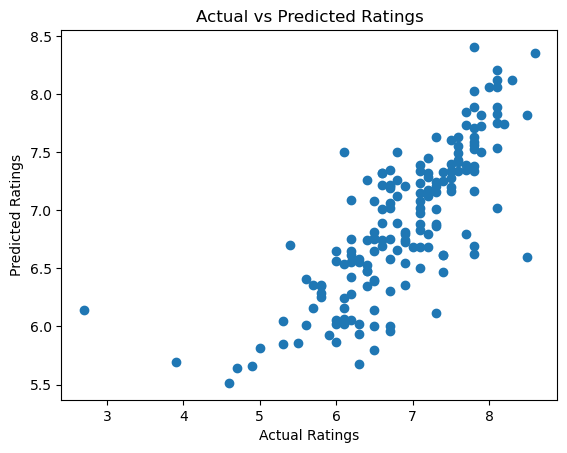

In [57]:
plt.figure()
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Ratings")
plt.ylabel("Predicted Ratings")
plt.title("Actual vs Predicted Ratings")
plt.show()

In [58]:
np.random.seed(42)

num_users = 50
num_movies = 100

ratings_matrix = np.random.randint(1, 6, size=(num_users, num_movies))

ratings_df = pd.DataFrame(ratings_matrix)


svd = TruncatedSVD(n_components=20, random_state=42)

latent_matrix = svd.fit_transform(ratings_df)

reconstructed_matrix = np.dot(latent_matrix, svd.components_)


cf_rmse = np.sqrt(
    mean_squared_error(
        ratings_df.values.flatten(),
        reconstructed_matrix.flatten()
    )
)

print("\n========== Collaborative Filtering ==========")
print("CF RMSE:", round(cf_rmse, 3))


user_id = 0
movie_id = 10

predicted_rating = reconstructed_matrix[user_id, movie_id]

print(f"Predicted rating for User {user_id} on Movie {movie_id}:",
      round(predicted_rating, 2))


========== Collaborative Filtering ==========
CF RMSE: 0.802
Predicted rating for User 0 on Movie 10: 2.84
